# Hierarchical clustering based on numeric data only

In [ ]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset
df = pd.read_csv("/content/drive/MyDrive/Priceline/JintongYu/all_data.csv")
df.head(1)

,Unnamed: 0,country_code,city_name,latitude,longitude,int_visitor_2019 (million),mountain,beach,island,lake,...,Dec-Feb Avg Temp (°F),Jun-Aug Avg Temp (°F),Near UNESCO World Heritage Site?,about_title,about_content,30_attractions_char,trip_clean,paragraph,para_clean,cluster
0,0,IT,ROME,41.89332,12.482932,22.5,1,0,0,1,...,50,77,1,About Rome,"All roads lead to Rome, so they say. Or maybe ...","['Historic Sites • Ancient Ruins', 'Ancient Ru...",historic site ancient ruin ancient ruin archit...,\nCaput Mundi (Latin)The Capital of the world\...,caput mundi latinthe capital world rome italia...,3


In [ ]:
# Extract observation names
ob = df.iloc[:,2]
ob.head()

0         ROME
1    BARCELONA
2     ISTANBUL
3        MILAN
4     FLORENCE
Name: city_name, dtype: object

In [ ]:
# Extract numeric variables
var = df.iloc[:,5:29]
var.columns

Index(['int_visitor_2019 (million)', 'mountain', 'beach', 'island', 'lake',
       'forest', 'river', 'desert', 'volcano', 'x-sports', 'nightlife',
       'resort', 'winter sports', 'sea sports', 'old town', 'golf', 'hiking',
       'horseback riding', 'lgbtq+', 'Climate Type', 'Hemisphere ',
       'Dec-Feb Avg Temp (°F)', 'Jun-Aug Avg Temp (°F)',
       'Near UNESCO World Heritage Site?'],
      dtype='object')

In [ ]:
# Concate the observation table with the numeric table
tab = pd.concat([ob, var], axis=1)
tab.head()

,city_name,int_visitor_2019 (million),mountain,beach,island,lake,forest,river,desert,volcano,...,old town,golf,hiking,horseback riding,lgbtq+,Climate Type,Hemisphere,Dec-Feb Avg Temp (°F),Jun-Aug Avg Temp (°F),Near UNESCO World Heritage Site?
0,ROME,22.5,1,0,0,1,1,1,1,1,...,1,1,1,1,1,Mediterranean,Northern,50,77,1
1,BARCELONA,9.1,1,1,0,1,1,1,0,0,...,1,1,1,1,1,Mediterranean,Northern,51,78,1
2,ISTANBUL,14.7,1,1,1,1,1,1,1,0,...,1,0,1,1,0,Mediterranean,Northern,46,75,1
3,MILAN,6.5,1,0,0,1,1,1,1,0,...,1,1,1,1,1,Humid subtropical / Mediterranean,Northern,38,77,0
4,FLORENCE,10.4,1,0,0,1,1,1,1,0,...,1,1,1,1,1,Mediterranean,Northern,43,81,1


In [ ]:
# Drop variables that have indistinct values or useless for defining tourism attributes
tab_subset = tab.drop(columns=["city_name", "Climate Type", "Hemisphere "])
tab_subset.shape

(180, 22)

In [ ]:
# Standardize the data
scaler = StandardScaler()
tab_subset_scaled = scaler.fit_transform(tab_subset)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=2, linkage='ward').fit(tab_subset_scaled)

In [ ]:
# Define linkage
linkage_matrix = linkage(tab_subset_scaled, method='ward')

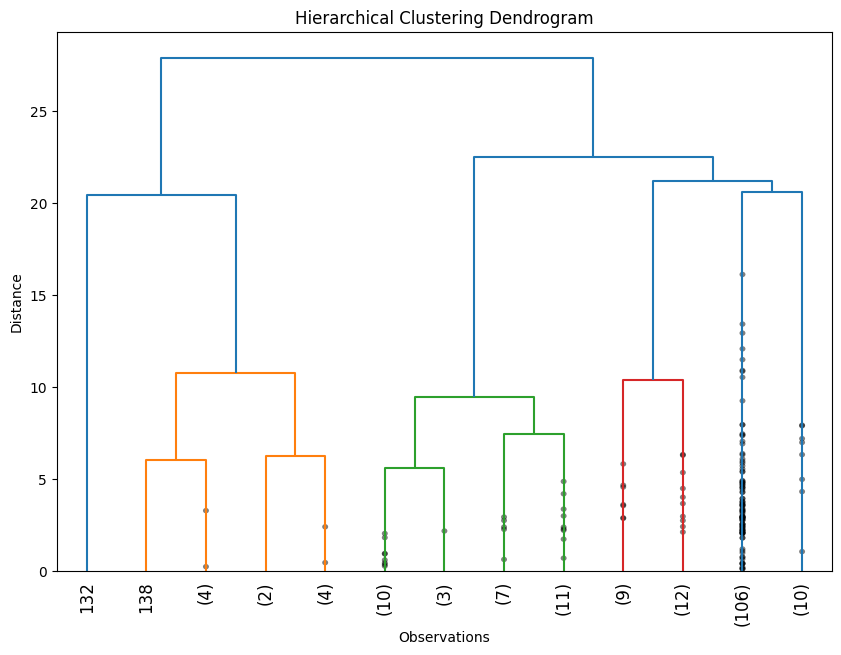

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=3,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.show()

In [ ]:
# Define the 6 most distinct clusters
clustering = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(tab_subset_scaled)
# Add cluster labels to the original dataframe
df['cluster'] = clustering.labels_

In [ ]:
# Count members of each cluster
df['cluster'].value_counts()

1    106
2     31
3     21
4     11
0     10
5      1
Name: cluster, dtype: int64

In [ ]:
# Find the outlier in cluster 5
print(df[df['cluster'] == 5]['city_name'])

132    MISSISSAUGA
Name: city_name, dtype: object


In [ ]:
# Compute the mean values of each feature for each cluster
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

         Unnamed: 0   latitude  longitude  int_visitor_2019 (million)  \
cluster                                                                 
0         73.500000  20.865405 -10.457900                    9.330000   
1        105.594340  23.492095 -13.815070                   10.891698   
2         76.935484  41.941272 -56.534570                   21.796129   
3         65.809524  31.852668 -44.432167                   10.075714   
4         25.727273  17.033568 -64.834298                    2.672727   
5        132.000000  43.589623 -79.644388                    3.400000   

         mountain     beach    island      lake    forest  river  ...  \
cluster                                                           ...   
0        0.600000  0.500000  0.100000  0.400000  0.600000    0.5  ...   
1        0.349057  0.669811  0.301887  0.716981  0.849057    1.0  ...   
2        0.064516  0.161290  0.064516  0.967742  1.000000    1.0  ...   
3        0.904762  0.285714  0.285714  0.904762  1

<ipython-input-24-5ef9182e844e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


In [ ]:
# Add labels back to the numeric-only data frame
tab_subset = pd.concat([tab_subset,df['cluster']], axis=1)

In [ ]:
# Calculate the mean value for each selected numeric feature
tab_subset.groupby('cluster').mean()

<ipython-input-32-3138e9bb6d97>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cate.groupby('cluster').mean()


,int_visitor_2019 (million),mountain,beach,island,lake,forest,river,desert,volcano,x-sports,...,winter sports,sea sports,old town,golf,hiking,horseback riding,lgbtq+,Dec-Feb Avg Temp (°F),Jun-Aug Avg Temp (°F),Near UNESCO World Heritage Site?
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.330000,0.600000,0.500000,0.100000,0.400000,0.600000,0.5,0.100000,0.100000,0.300000,...,0.300000,0.500000,1.000000,0.5,1.0,1.0,0.7,58.600000,81.800000,0.400000
1,10.891698,0.349057,0.669811,0.301887,0.716981,0.849057,1.0,0.009434,0.160377,0.481132,...,0.622642,0.858491,0.981132,1.0,1.0,1.0,1.0,55.915094,79.396226,0.405660
2,21.796129,0.064516,0.161290,0.064516,0.967742,1.000000,1.0,0.000000,0.000000,0.032258,...,0.290323,0.129032,1.000000,1.0,1.0,1.0,1.0,30.903226,77.967742,0.516129
3,10.075714,0.904762,0.285714,0.285714,0.904762,1.000000,1.0,1.000000,0.380952,0.666667,...,0.571429,0.523810,0.952381,1.0,1.0,1.0,1.0,44.428571,81.523810,0.380952
4,2.672727,0.272727,1.000000,0.909091,0.090909,1.000000,1.0,0.000000,0.090909,0.818182,...,0.000000,0.909091,0.454545,1.0,1.0,1.0,0.0,71.636364,83.909091,0.000000
5,3.400000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,21.000000,71.000000,0.000000


In [ ]:
# Calculate the standard deviation to find the most significant(variable) features
std_series = tab_subset.std()
std_series.sort_values(ascending=False)

<ipython-input-33-98a722eb7f11>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_series = cate.std()


Dec-Feb Avg Temp (°F)               18.386136
int_visitor_2019 (million)          13.193873
Jun-Aug Avg Temp (°F)                9.612820
cluster                              1.015094
winter sports                        0.501395
beach                                0.498881
resort                               0.498290
x-sports                             0.496918
Near UNESCO World Heritage Site?     0.490094
mountain                             0.484746
sea sports                           0.470713
island                               0.451874
lake                                 0.446345
volcano                              0.358067
desert                               0.334773
forest                               0.315146
nightlife                            0.277156
lgbtq+                               0.268569
old town                             0.229700
river                                0.164794
golf                                 0.164794
horseback riding                  

**Cluster 0**: This cluster has high values for mountain, beach, forest, hiking, and horseback riding, suggesting that it may be a cluster of destinations that are popular for outdoor activities.

**Cluster 1**: This cluster has high values for beach, island, lake, sea sports, and UNESCO World Heritage Sites, suggesting that it may be a cluster of destinations that are popular for water-based activities and cultural tourism.

**Cluster 2**: This cluster has high values for lake, forest, winter sports, and horseback riding, suggesting that it may be a cluster of destinations that are popular for outdoor activities in colder climates.

**Cluster 3**: This cluster has high values for mountain, lake, forest, hiking, and horseback riding, suggesting that it may be a cluster of destinations that are popular for outdoor activities in mountainous regions.

**Cluster 4**: This cluster has high values for beach, island, golf, and sea sports, suggesting that it may be a cluster of destinations that are popular for leisurely outdoor activities in tropical or coastal areas.  

**Cluster 5** has only one member, so it may not be meaningful to analyze its distinct features. However, we can see that this destination has high values for beach, lake, and Jun-Aug Average Temperature, indicating that it may be a popular summer destination with a focus on water activities.

It's important to note that these are just potential interpretations based on the features with high values for each cluster. It may be useful to do further analysis and research to confirm these interpretations.